In [ ]:
# Latihan 1
# Import library numpy untuk operasi fungsi aritmatika
import numpy as np

# import library pandas untuk operasi dataframe
import pandas as pd

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Import library Axes3D untuk vizualisasi 3 Dimensi 
from mpl_toolkits.mplot3d import Axes3D

# import library datetime untuk operasi yang berhubungan dengan waktu.
import datetime

# import library Label encoder untuk mengubah setiap nilai dalam kolom menjadi angka yang berurutan / numeric
from sklearn.preprocessing import LabelEncoder

# import library StandardScaler untuk menskalakan nilai kolom jika terdpaat perbedaan skala, StandardScaler berfungsi menghilangkan mean (terpusat pada 0) dan menskalakan ke variansi (deviasi standar = 1), dengan asumsi data terdistribusi normal (gauss) untuk semua fitur
from sklearn.preprocessing import StandardScaler

# import library PCA adalah prosedur statistik yang mengekstrak fitur-fitur terpenting dari suatu dataset
from sklearn.decomposition import PCA

# import library KElbowVisualizer untuk mengimplementasikan metode "elbow/siku" untuk data scientist memilih jumlah cluster yang optimal dengan menyesuaikan model dengan rentang nilai untuk K
from yellowbrick.cluster import KElbowVisualizer

# import library KMeans metode adalah teknik unsupervised machine learning yang digunakan untuk mengidentifikasi kelompok objek data dalam kumpulan data
from sklearn.cluster import KMeans

# import library AgglomerativeClustering untuk melakukan pengelompokan data menggunakan bottom-up manner
from sklearn.cluster import AgglomerativeClustering


# import library metrics untuk mengimplementasikan fungsi yang menilai kesalahan prediksi untuk tujuan tertentu
from sklearn import metrics

# me-non aktifkan peringatan pada python
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# mendefinisikan nilai acak 
np.random.seed(42)

In [ ]:
# Latihan 2
#Load the dataset dan tampilkan data nya 
data = pd.read_csv('marketing_campaign.csv', sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation  ...             3         11         1
1  2174        1954  Graduation  ...             3         11         0
2  4141        1965  Graduation  ...             3         11         0
3  6182        1984  Graduation  ...             3         11         0
4  5324        1981         PhD  ...             3         11         0

[5 rows x 29 columns]

In [ ]:
# Latihan 3
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# menghapus missing values
data = data.dropna()
print("Jumlah data setelah menghapus baris dengan nilai yang hilang adalah:", len(data))

Jumlah data setelah menghapus baris dengan nilai yang hilang adalah: 2216


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
    
# Tanggal pelanggan terbaru dan terlama yang tercatat
print("Tanggal pendaftaran pelanggan terbaru dalam catatan:",max(dates))
print("Tanggal pendaftaran pelanggan terlama dalam catatan:",min(dates))

Tanggal pendaftaran pelanggan terbaru dalam catatan: 2014-12-06
Tanggal pendaftaran pelanggan terlama dalam catatan: 2012-01-08


In [ ]:
# Membuat fitur "Customer_For"
days = []
d1 = max(dates) # membawanya menjadi pelanggan terbaru
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [ ]:
print("Total kategori dalam fitur Marital_Status:\n\n", data["Marital_Status"].value_counts(), "\n")
print("Total kategori dalam fitur Education:\n\n", data["Education"].value_counts())

Total kategori dalam fitur Marital_Status:

 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Total kategori dalam fitur Education:

 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
# Latihan 4
#Feature Engineering

# Usia pelanggan hari ini 
data["Age"] = 2021-data["Year_Birth"]

# Total pengeluaran untuk berbagai macam item
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# situasi kehidupan dari status pernikahan "Alone" 
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# Fitur yang menunjukkan jumlah anak yang tinggal di rumah tangga
data["Children"]=data["Kidhome"]+data["Teenhome"]

# Fitur untuk total anggota dalam rumah tangga
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

# Fitur yang berkaitan dengan orang tua
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

# Segmentasi tingkat pendidikan dalam tiga kelompok
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Untuk kejelasan produk
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


# Drop / Menjatuhkan beberapa fitur yang berlebihan / redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
# melihat statistik data untuk data numeric
data.describe()

Income      Kidhome  ...  Family_Size    Is_Parent
count    2216.000000  2216.000000  ...  2216.000000  2216.000000
mean    52247.251354     0.441787  ...     2.592509     0.714350
std     25173.076661     0.536896  ...     0.905722     0.451825
min      1730.000000     0.000000  ...     1.000000     0.000000
25%     35303.000000     0.000000  ...     2.000000     0.000000
50%     51381.500000     0.000000  ...     3.000000     1.000000
75%     68522.000000     1.000000  ...     3.000000     1.000000
max    666666.000000     2.000000  ...     5.000000     1.000000

[8 rows x 28 columns]

Plot Relatif Dari Beberapa Fitur Terpilih: Subset Data


<Figure size 432x288 with 0 Axes>

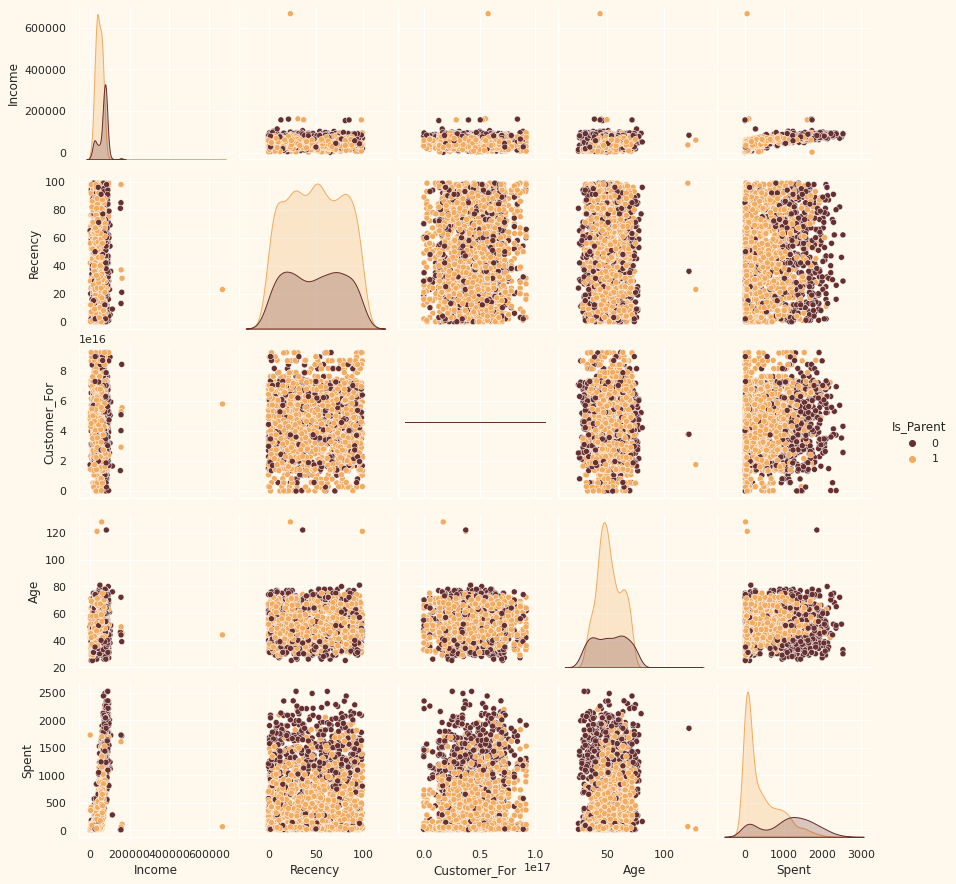

In [ ]:
# Latihan 5
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


#Plotting fitur
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Plot Relatif Dari Beberapa Fitur Terpilih: Subset Data")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

In [ ]:
# Drop outlier dengan menetapkan batas pada Usia dan pendapatan.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("Jumlah total data setelah menghapus outlier adalah:", len(data))

Jumlah total data setelah menghapus outlier adalah: 2212


In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
# Latihan 6
# Get List dari variabel categorical
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variabel kategori dalam dataset:", object_cols)

Variabel kategori dalam dataset: ['Education', 'Living_With']


In [ ]:
# Label Encoding (dtypes: objek)
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("Semua fitur sekarang numerik")

Semua fitur sekarang numerik


In [ ]:
# Membuat salinan data
ds = data.copy()

# membuat subset dataframe dengan menghapus fitur pada penawaran yang diterima (features on deals accepted) dan promosi (promotions)
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("Semua fitur sekarang sudah diskalakan")

Semua fitur sekarang sudah diskalakan


In [ ]:
# Data yang diskalakan untuk digunakan untuk mengurangi dimensi/reducing the dimensionality
print("Dataframe yang akan digunakan untuk pemodelan lebih lanjut:")
scaled_ds.head()

Dataframe yang akan digunakan untuk pemodelan lebih lanjut:


Education    Income   Kidhome  ...  Children  Family_Size  Is_Parent
0  -0.893586  0.287105 -0.822754  ... -1.264598    -1.758359  -1.581139
1  -0.893586 -0.260882  1.040021  ...  1.404572     0.449070   0.632456
2  -0.893586  0.913196 -0.822754  ... -1.264598    -0.654644  -1.581139
3  -0.893586 -1.176114  1.040021  ...  0.069987     0.449070   0.632456
4   0.571657  0.294307  1.040021  ...  0.069987     0.449070   0.632456

[5 rows x 23 columns]

In [ ]:
# Latihan 7
# Memulai PCA untuk mengurangi dimensi alias fitur menjadi 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std  ...       50%       75%       max
col1  2212.0 -8.612761e-17  2.878377  ... -0.780421  2.383290  7.444305
col2  2212.0  2.559737e-17  1.706839  ... -0.158123  1.242289  6.142721
col3  2212.0  4.449425e-17  1.221956  ... -0.022692  0.799895  6.611222

[3 rows x 8 columns]

In [ ]:
# Proyeksi 3D Data Dalam Dimensi yang Dikurangi/Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

# plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Proyeksi 3D Data Dalam Dimensi yang Dikurangi/Reduced Dimension")
plt.show()

In [ ]:
# Latihan 8
# Quick examination of elbow method to find numbers of clusters to make.
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:


In [ ]:
# Memulai model Agglomerative Clustering 
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Menambahkan fitur Cluster ke dataframe asli.
data["Clusters"]= yhat_AC

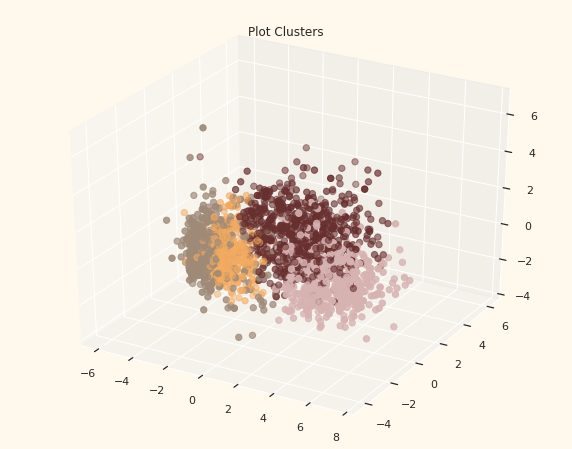

In [ ]:
#Plotting clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Plot Clusters")
plt.show()

In [ ]:
# Latihan 9
#Plotting countplot dari clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Profil Cluster Berdasarkan Income Dan Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


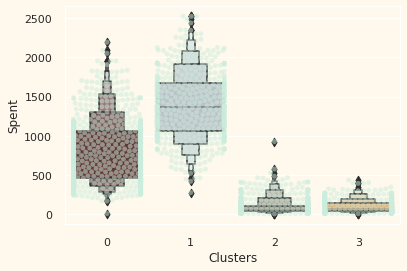

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

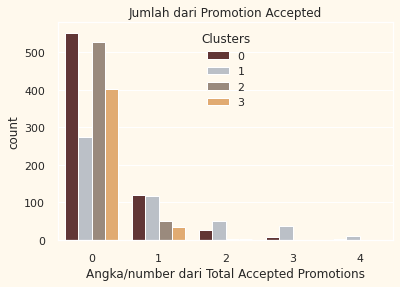

In [ ]:
# Membuat fitur untuk mendapatkan sejumlah promosi yang diterima/accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

# plotting Jumlah dari total kampanye yang diterima.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Jumlah dari Promotion Accepted")
pl.set_xlabel("Angka/number dari Total Accepted Promotions")
plt.show()

In [ ]:
#Plotting jumlah transaksi yang dibeli / deals purchased 
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Angka dari Deals Purchases")
plt.show()

<Figure size 432x288 with 0 Axes>

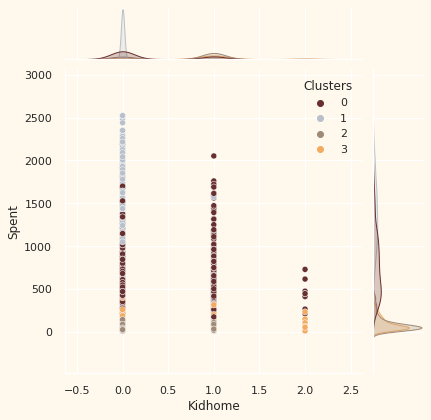

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

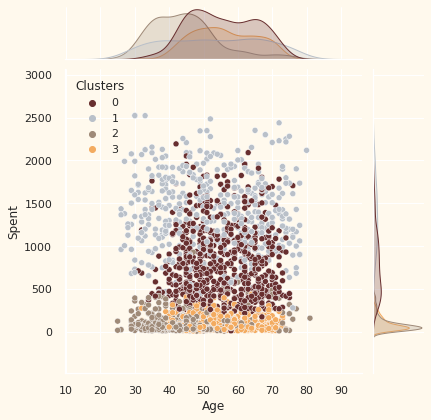

<Figure size 432x288 with 0 Axes>

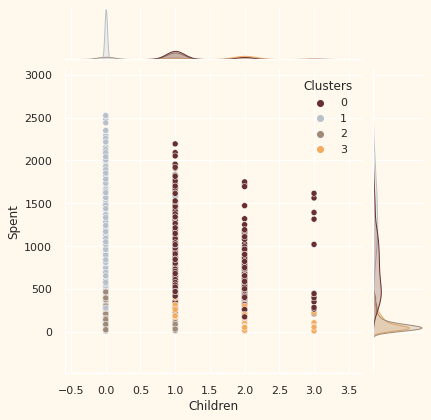

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

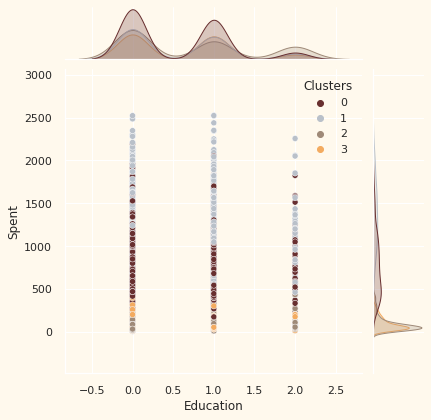

<Figure size 432x288 with 0 Axes>

In [ ]:
# untuk detail lebih lanjut tentang gaya pembelian/purchasing style 
Places = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

<Figure size 432x288 with 0 Axes>

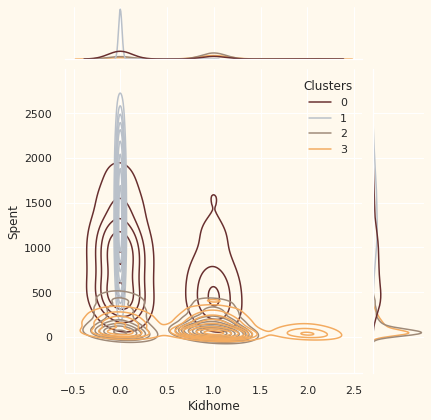

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

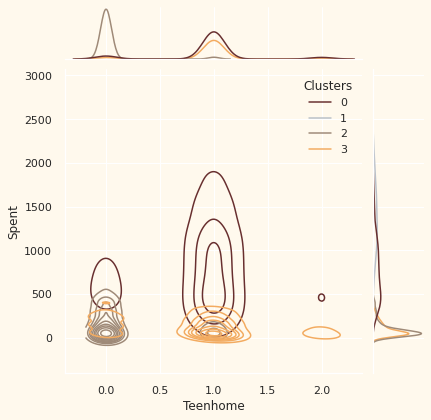

<Figure size 432x288 with 0 Axes>

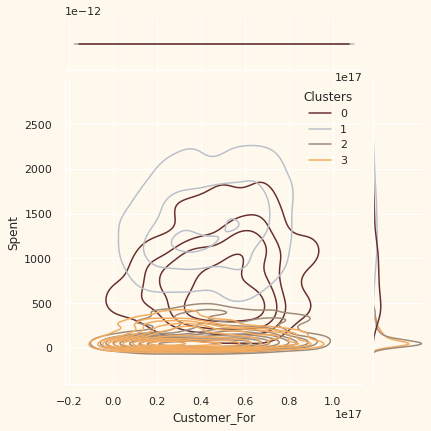

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

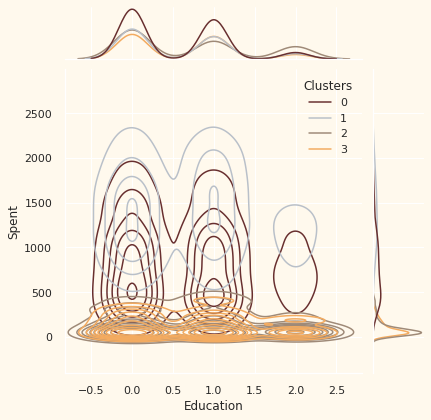

<Figure size 432x288 with 0 Axes>

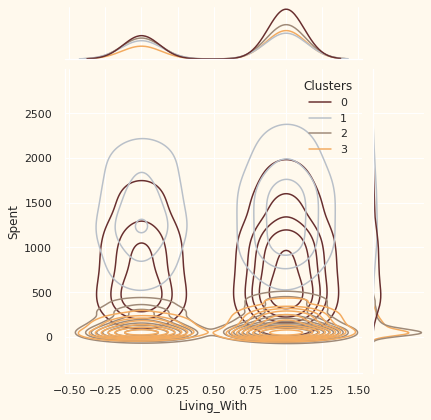

In [ ]:
# Latihan 10
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()
